In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

https://www.kaggle.com/code/shivan118/natural-language-processing-master

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from gensim import corpora, models
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
!pip install bertopic

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


  Obtaining dependency information for bertopic from https://files.pythonhosted.org/packages/43/da/182ef741d2510965a82a21332fa5706d1e9095c7a673436344442efceea9/bertopic-0.16.0-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Obtaining dependency information for sentence-transformers>=0.4.1 from https://files.pythonhosted.org/packages/06/97/57afa3d05801b6b9305f96a7ce5995e12c1d2ba25ce66747de107816b0b5/sentence_transformers-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for cython<3,>=0.27 from https://files.pythonhosted.org/packages/5b/b7/6e35bbbf253ff6c383eec57baab1c6814107b2b9caf26b10e9c25014bb1e/Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata
  Using cached Cython-0.29

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/road-project-survey-data/Survey.xlsx


In [4]:
df =pd.read_excel('/kaggle/input/road-project-survey-data/Survey.xlsx')

In [5]:
df.head()

,Comment
0,"The existing road is too wide, and it allows f..."
1,The entire length of the street is ridiculousl...
2,Sidewalk and street not wide enough.
3,"People drive way too fast, and run stop signs...."
4,Children frequently ride bikes on the sidewalk...


The file is a text only column csv file.

In [6]:
print(df['Comment'].dtype)

object


In [7]:
def extract_keywords(Comment):
    comment_str = str(Comment)
    tokens = word_tokenize(Comment.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word.lower() not in stop_words]
    freq_dist = FreqDist(filtered_tokens)
    top_keywords = [word for word, _ in freq_dist.most_common(5)]
    return top_keywords, filtered_tokens


In [8]:
# Convert non-string elements to strings in the 'Comment' column
df['Comment'] = df['Comment'].astype(str)

In [9]:
# Add a new 'keywords' column
stop_words = stopwords.words('english')
df['keywords'] = df['Comment'].apply(lambda Comment: extract_keywords(Comment))

In [10]:
df.head()

,Comment,keywords
0,"The existing road is too wide, and it allows f...","([cars, also, stop, existing, road], [existing..."
1,The entire length of the street is ridiculousl...,"([time, entire, length, street, ridiculously],..."
2,Sidewalk and street not wide enough.,"([sidewalk, street, wide, enough], [sidewalk, ..."
3,"People drive way too fast, and run stop signs....","([drive, stop, people, way, fast], [people, dr..."
4,Children frequently ride bikes on the sidewalk...,"([children, frequently, ride, bikes, sidewalk]..."


In [11]:
pip install twython

Note: you may need to restart the kernel to use updated packages.


In [12]:
def analyze_sentiment(Comment):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(Comment)['compound']
    
    # Categorize comments as 'Negative' if compound score is below a certain threshold
    threshold = -0.05  # Adjust as needed
    return 'Negative' if sentiment_score < threshold else 'Neutral' if sentiment_score == 0 else 'Positive'

In [13]:
# Add a new 'Sentiment' column
df['Sentiment'] = df['Comment'].apply(analyze_sentiment)

In [14]:
df.head(10)

,Comment,keywords,Sentiment
0,"The existing road is too wide, and it allows f...","([cars, also, stop, existing, road], [existing...",Positive
1,The entire length of the street is ridiculousl...,"([time, entire, length, street, ridiculously],...",Positive
2,Sidewalk and street not wide enough.,"([sidewalk, street, wide, enough], [sidewalk, ...",Neutral
3,"People drive way too fast, and run stop signs....","([drive, stop, people, way, fast], [people, dr...",Negative
4,Children frequently ride bikes on the sidewalk...,"([children, frequently, ride, bikes, sidewalk]...",Neutral
5,People drive too fast and run stop signs. It’s...,"([people, drive, fast, run, stop], [people, dr...",Negative
6,New sidewalks to repair broken or raised sidew...,"([sidewalks, need, new, repair, broken], [new,...",Negative
7,Calm traffc flow,"([calm, traffc, flow], [calm, traffc, flow])",Positive
8,Intersection of Highcroft ridge and schoettler...,"([intersection, highcroft, ridge, schoettler, ...",Neutral
9,"I answered yes, but there appears to be a high...","([answered, yes, appears, high, likelihood], [...",Negative


In [15]:
# Add a new 'Negative Category' column
threshold = -0.1  # Same threshold used in sentiment analysis
df['Negative Category'] = df['Comment'].apply(lambda comment: 'Negative' if analyze_sentiment(comment) == 'Negative' else 'Not Negative')

In [16]:
example = df['Comment'][0]

In [17]:
example

"The existing road is too wide, and it allows for cars to drive at speeds that are dangerous for a residential area. I'm also afraid to let my 4 year-old son play in the front yard because cars frequently don't stop at the Highcroft / Chequer stop sign. There is also no place (but the sidewalk) for all of the kids on our street to bike safely."

In [18]:
tokens = nltk.word_tokenize(example)
tokens[:20]

['The',
 'existing',
 'road',
 'is',
 'too',
 'wide',
 ',',
 'and',
 'it',
 'allows',
 'for',
 'cars',
 'to',
 'drive',
 'at',
 'speeds',
 'that',
 'are',
 'dangerous',
 'for']

In [19]:
sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores(example)

{'neg': 0.073, 'neu': 0.798, 'pos': 0.129, 'compound': 0.4724}

In [21]:
df.head()

,Comment,keywords,Sentiment,Negative Category
0,"The existing road is too wide, and it allows f...","([cars, also, stop, existing, road], [existing...",Positive,Not Negative
1,The entire length of the street is ridiculousl...,"([time, entire, length, street, ridiculously],...",Positive,Not Negative
2,Sidewalk and street not wide enough.,"([sidewalk, street, wide, enough], [sidewalk, ...",Neutral,Not Negative
3,"People drive way too fast, and run stop signs....","([drive, stop, people, way, fast], [people, dr...",Negative,Negative
4,Children frequently ride bikes on the sidewalk...,"([children, frequently, ride, bikes, sidewalk]...",Neutral,Not Negative


In [22]:
from tqdm.notebook import tqdm

In [23]:
# Calculate polarity scores for each comment in 'Comment' column
df['Polarity Score'] = df['Comment'].apply(lambda comment: sia.polarity_scores(comment)['compound'])

In [24]:
df.head(10)

,Comment,keywords,Sentiment,Negative Category,Polarity Score
0,"The existing road is too wide, and it allows f...","([cars, also, stop, existing, road], [existing...",Positive,Not Negative,0.4724
1,The entire length of the street is ridiculousl...,"([time, entire, length, street, ridiculously],...",Positive,Not Negative,-0.0258
2,Sidewalk and street not wide enough.,"([sidewalk, street, wide, enough], [sidewalk, ...",Neutral,Not Negative,0.0000
3,"People drive way too fast, and run stop signs....","([drive, stop, people, way, fast], [people, dr...",Negative,Negative,-0.5267
4,Children frequently ride bikes on the sidewalk...,"([children, frequently, ride, bikes, sidewalk]...",Neutral,Not Negative,0.0000
5,People drive too fast and run stop signs. It’s...,"([people, drive, fast, run, stop], [people, dr...",Negative,Negative,-0.5994
6,New sidewalks to repair broken or raised sidew...,"([sidewalks, need, new, repair, broken], [new,...",Negative,Negative,-0.4767
7,Calm traffc flow,"([calm, traffc, flow], [calm, traffc, flow])",Positive,Not Negative,0.3182
8,Intersection of Highcroft ridge and schoettler...,"([intersection, highcroft, ridge, schoettler, ...",Neutral,Not Negative,0.0000
9,"I answered yes, but there appears to be a high...","([answered, yes, appears, high, likelihood], [...",Negative,Negative,-0.2382


In [25]:
# Map polarity scores to sentiment categories
df['Sentiment Category'] = df['Polarity Score'].apply(lambda score: 'Positive' if score > 0 else 'Neutral' if score == 0 else 'Negative')

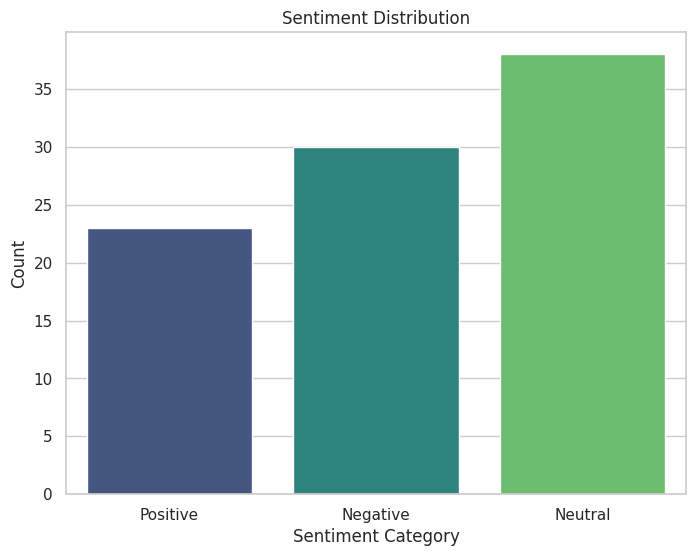

In [26]:
# Plot sentiment distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment Category', data=df, palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [27]:
# Concatenate all comments into a single string
all_comments = ' '.join(df['Comment'])

In [28]:
additional_stopwords = ['Highcroft','Schoettler Valley','Chesterfield'] #adding a stopword because this is the name of the street

In [29]:
# Combine the default stopwords with additional stopwords
stopwords = STOPWORDS.union(additional_stopwords)

In [30]:
# Function to preprocess the text by removing stopwords
def preprocess_text(text, stopwords):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

In [31]:
# Apply preprocessing to remove stopwords
preprocessed_comments = df['Comment'].apply(lambda x: preprocess_text(x, additional_stopwords))
all_comments_no_stopwords = ' '.join(preprocessed_comments)

In [32]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

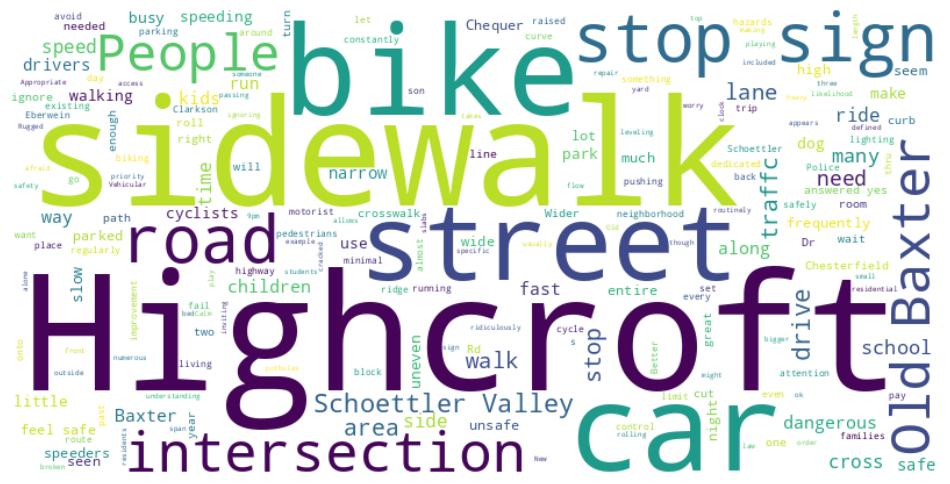

In [33]:
# Display the generated word cloud using matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud Visualization')
plt.show()

# Topic modeling 

https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners

In [34]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [35]:
df['Tokenized Comments'] = df['Comment'].apply(extract_keywords)

In [36]:
df.head()

,Comment,keywords,Sentiment,Negative Category,Polarity Score,Sentiment Category,Tokenized Comments
0,"The existing road is too wide, and it allows f...","([cars, also, stop, existing, road], [existing...",Positive,Not Negative,0.4724,Positive,"([cars, also, stop, existing, road], [existing..."
1,The entire length of the street is ridiculousl...,"([time, entire, length, street, ridiculously],...",Positive,Not Negative,-0.0258,Negative,"([time, entire, length, street, ridiculously],..."
2,Sidewalk and street not wide enough.,"([sidewalk, street, wide, enough], [sidewalk, ...",Neutral,Not Negative,0.0000,Neutral,"([sidewalk, street, wide, enough], [sidewalk, ..."
3,"People drive way too fast, and run stop signs....","([drive, stop, people, way, fast], [people, dr...",Negative,Negative,-0.5267,Negative,"([drive, stop, people, way, fast], [people, dr..."
4,Children frequently ride bikes on the sidewalk...,"([children, frequently, ride, bikes, sidewalk]...",Neutral,Not Negative,0.0000,Neutral,"([children, frequently, ride, bikes, sidewalk]..."


In [37]:
# Create SentenceTransformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [38]:
# Instantiate BERTopic
bertopic_model = BERTopic(language='english', embedding_model=model)

In [39]:
# Convert the tokenized comments to strings
df['Tokenized Comments'] = df['Tokenized Comments'].apply(lambda tokens: ' '.join(map(str, tokens)))

In [40]:
# Fit the BERTopic model
topics, _ = bertopic_model.fit_transform(df['Tokenized Comments'])


In [41]:
topic_keywords = bertopic_model.get_topic_info()

In [42]:
topic_keywords

,Topic,Count,Name,Representation,Representative_Docs
0,-1,33,-1_bike_narrow_feel_lane,"[bike, narrow, feel, lane, safe, road, street,...","[['walk', 'feel', 'streets', 'busy', 'safely']..."
1,0,33,0_stop_cars_drive_people,"[stop, cars, drive, people, signs, highcroft, ...","[['people', 'stop', 'signs', 'speeding'] ['peo..."
2,1,13,1_sidewalks_uneven_sidewalk_need,"[sidewalks, uneven, sidewalk, need, maintained...","[['sidewalk', 'uneven'] ['sidewalk', 'uneven']..."
3,2,12,2_baxter_old_highcroft_intersection,"[baxter, old, highcroft, intersection, park, s...","[['baxter', 'old', 'highcroft', 'cars', 'inter..."


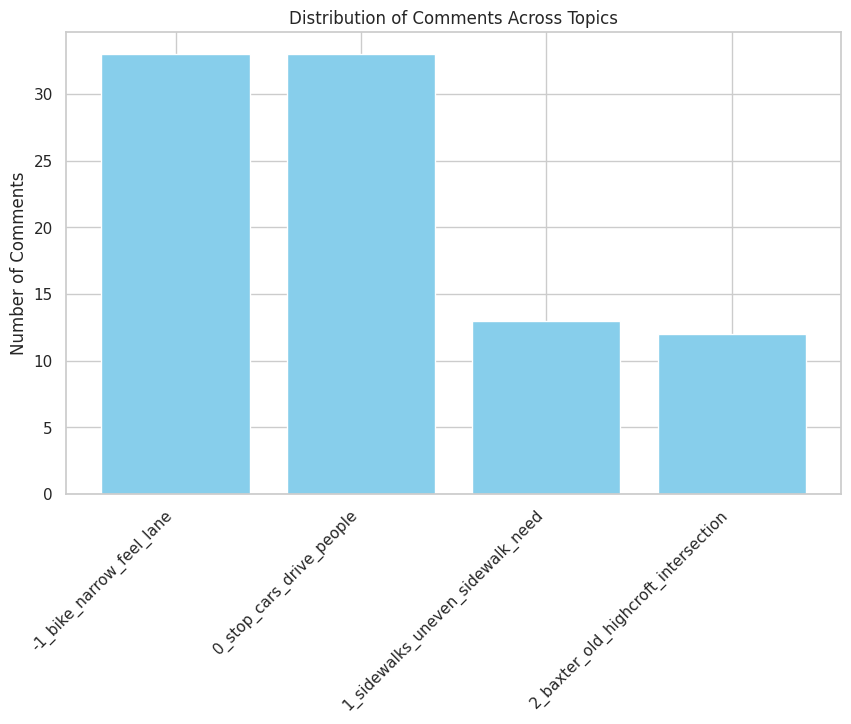

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(topic_keywords['Name'], topic_keywords['Count'], color='skyblue')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Comments Across Topics')
plt.show()

In [44]:
df.head()

,Comment,keywords,Sentiment,Negative Category,Polarity Score,Sentiment Category,Tokenized Comments
0,"The existing road is too wide, and it allows f...","([cars, also, stop, existing, road], [existing...",Positive,Not Negative,0.4724,Positive,"['cars', 'also', 'stop', 'existing', 'road'] [..."
1,The entire length of the street is ridiculousl...,"([time, entire, length, street, ridiculously],...",Positive,Not Negative,-0.0258,Negative,"['time', 'entire', 'length', 'street', 'ridicu..."
2,Sidewalk and street not wide enough.,"([sidewalk, street, wide, enough], [sidewalk, ...",Neutral,Not Negative,0.0000,Neutral,"['sidewalk', 'street', 'wide', 'enough'] ['sid..."
3,"People drive way too fast, and run stop signs....","([drive, stop, people, way, fast], [people, dr...",Negative,Negative,-0.5267,Negative,"['drive', 'stop', 'people', 'way', 'fast'] ['p..."
4,Children frequently ride bikes on the sidewalk...,"([children, frequently, ride, bikes, sidewalk]...",Neutral,Not Negative,0.0000,Neutral,"['children', 'frequently', 'ride', 'bikes', 's..."


In [45]:
# Ensure that the lengths match
if len(df) == len(topic_keywords):
    # Map numeric topic labels to more descriptive labels
    df['Topic Labels'] = [f"Topic {topic_id} - {keywords}" for topic_id, keywords in zip(topic_keywords['Topic'], topic_keywords['Representation'])]

    # Print the transformed topics
    print(df['Topic Labels'])
else:
    print("Error: Length mismatch between DataFrame and topic_keywords.")


Error: Length mismatch between DataFrame and topic_keywords.


In [46]:
# Print lengths
print("Length of DataFrame:", len(df))
print("Length of topic_keywords:", len(topic_keywords))

# Print the structure of topic_keywords
print(topic_keywords)

Length of DataFrame: 91
Length of topic_keywords: 4
   Topic  Count                                 Name  \
0     -1     33             -1_bike_narrow_feel_lane   
1      0     33             0_stop_cars_drive_people   
2      1     13     1_sidewalks_uneven_sidewalk_need   
3      2     12  2_baxter_old_highcroft_intersection   

                                      Representation  \
0  [bike, narrow, feel, lane, safe, road, street,...   
1  [stop, cars, drive, people, signs, highcroft, ...   
2  [sidewalks, uneven, sidewalk, need, maintained...   
3  [baxter, old, highcroft, intersection, park, s...   

                                 Representative_Docs  
0  [['walk', 'feel', 'streets', 'busy', 'safely']...  
1  [['people', 'stop', 'signs', 'speeding'] ['peo...  
2  [['sidewalk', 'uneven'] ['sidewalk', 'uneven']...  
3  [['baxter', 'old', 'highcroft', 'cars', 'inter...  


# Latent Dirichlet Allocation (LDA)

#### https://towardsdatascience.com/using-machine-learning-to-analyse-qualitative-survey-data-1794416e5474
#### https://github.com/chawlasahaj/qualitative-topic-modelling

In [47]:
from gensim import corpora, models

In [48]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [49]:
import time
import ast
import re
import requests

In [50]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVR

In [51]:
new_words=('well','need','option','also','let', 'new', 'nice','great', 'stop', 'go', 'get', 'good', 'want','make','keep','would')
for i in new_words:
    stop_words.append(i)

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [53]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora

In [54]:
from gensim.utils import simple_preprocess

from gensim.utils import lemmatize, simple_preprocess was the original code. Lemmatization doesnt work with new genism versions

In [55]:
from gensim.models import CoherenceModel
import warnings
warnings.filterwarnings('ignore')

In [56]:
def sent_to_words(sentences):  #Topic visualization
    for x in sentences:
        x = re.sub("\'", "", x)  # remove single quotes
        x = gensim.utils.simple_preprocess(str(x), deacc=True) 
        yield(x)  

# Convert to list
data = df['Comment'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['the', 'existing', 'road', 'is', 'too', 'wide', 'and', 'it', 'allows', 'for', 'cars', 'to', 'drive', 'at', 'speeds', 'that', 'are', 'dangerous', 'for', 'residential', 'area', 'im', 'also', 'afraid', 'to', 'let', 'my', 'year', 'old', 'son', 'play', 'in', 'the', 'front', 'yard', 'because', 'cars', 'frequently', 'dont', 'stop', 'at', 'the', 'highcroft', 'chequer', 'stop', 'sign', 'there', 'is', 'also', 'no', 'place', 'but', 'the', 'sidewalk', 'for', 'all', 'of', 'the', 'kids', 'on', 'our', 'street', 'to', 'bike', 'safely']]


In [57]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

per_word_topics (bool) – If True, the model also computes a list of topics, sorted in descending order of most likely topics for each word, along with their phi values multiplied by the feature length (i.e. word count).

In [58]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [59]:
nlp = spacy.load("en_core_web_sm")

In [60]:
data_ready = process_words(data_words)  # processed Text Data

In [61]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           #random_state=42,
                                           update_every=1,
                                           chunksize=10,
                                           #passes=10,
                                           #alpha='asymmetric',
                                           #iterations=100,
                                           per_word_topics=True)
                                           

print(lda_model.print_topics())

[(0, '0.031*"walk" + 0.027*"wait" + 0.023*"turn" + 0.022*"people" + 0.021*"right" + 0.019*"way" + 0.019*"fast" + 0.016*"speeder" + 0.016*"drive" + 0.016*"many"'), (1, '0.158*"bike" + 0.118*"ride" + 0.105*"safe" + 0.079*"none" + 0.048*"baxter" + 0.033*"highcroft" + 0.033*"lane" + 0.016*"park" + 0.013*"school" + 0.012*"cyclist"'), (2, '0.170*"road" + 0.086*"car" + 0.044*"old" + 0.025*"none" + 0.025*"area" + 0.024*"street" + 0.024*"sign" + 0.022*"narrow" + 0.018*"wide" + 0.015*"speed"'), (3, '0.105*"sidewalk" + 0.081*"intersection" + 0.034*"uneven" + 0.028*"slow" + 0.024*"side" + 0.023*"chesterfield" + 0.016*"driver" + 0.015*"maintain" + 0.014*"curb" + 0.012*"high"')]


In [62]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Initialize a list to collect data
    data = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                data.append({
                    'Dominant_Topic': int(topic_num),
                    'Perc_Contribution': round(prop_topic, 4),
                    'Topic_Keywords': topic_keywords,
                    'Original_Text': texts[i]
                })
                break

    # Create DataFrame from the collected data
    sent_topics_df = pd.DataFrame(data)
    return sent_topics_df

In [63]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)


In [64]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.9682,"road, car, old, none, area, street, sign, narr...","[exist, road, wide, allow, car, drive, speed, ..."
1,1,2,0.8222,"road, car, old, none, area, street, sign, narr...","[entire, length, street, ridiculously, wide, i..."
2,2,2,0.6741,"road, car, old, none, area, street, sign, narr...","[sidewalk, street, wide, enough]"
3,3,0,0.9524,"walk, wait, turn, people, right, way, fast, sp...","[people, drive, way, fast, run, sign, usually,..."
4,4,1,0.7902,"bike, ride, safe, none, baxter, highcroft, lan...","[child, frequently, ride, bike, sidewalk, unde..."
5,5,0,0.6247,"walk, wait, turn, people, right, way, fast, sp...","[people, drive, fast, run, sign, neighborhood,..."
6,6,3,0.9160,"sidewalk, intersection, uneven, slow, side, ch...","[sidewalk, repair, break, raise, sidewalk, cro..."
7,7,3,0.5933,"sidewalk, intersection, uneven, slow, side, ch...",[flow]
8,8,3,0.6250,"sidewalk, intersection, uneven, slow, side, ch...",[intersection]
9,9,3,0.8383,"sidewalk, intersection, uneven, slow, side, ch...","[answer, appear, high, likelihood, driver, run..."


In [65]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9524,"walk, wait, turn, people, right, way, fast, speeder, drive, many","[people, drive, way, fast, run, sign, usually, walk, dog, pm, bed, set, drive, run, sign]"
1,1,0.8927,"bike, ride, safe, none, baxter, highcroft, lane, park, school, cyclist","[feel, safe, designate, bike, path, barrier]"
2,2,0.9682,"road, car, old, none, area, street, sign, narrow, wide, speed","[exist, road, wide, allow, car, drive, speed, dangerous, residential, area, afraid, year, old, s..."
3,3,0.9160,"sidewalk, intersection, uneven, slow, side, chesterfield, driver, maintain, curb, high","[sidewalk, repair, break, raise, sidewalk, crosswalk, slow, driver]"


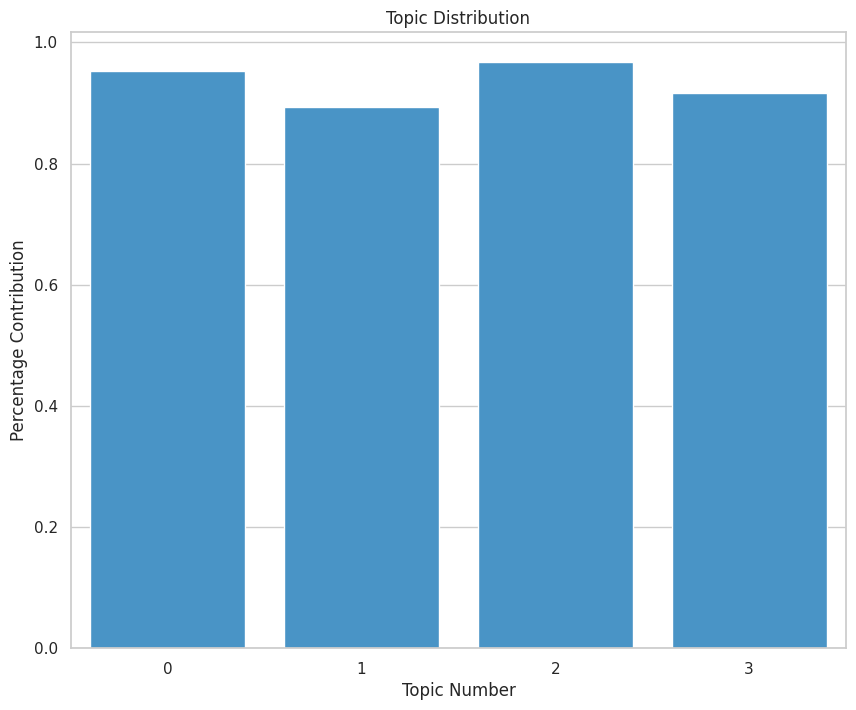

In [66]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Topic_Num', y='Topic_Perc_Contrib', data=sent_topics_sorteddf_mallet, color="#3498db")
plt.title('Topic Distribution')
plt.xlabel('Topic Number')
plt.ylabel('Percentage Contribution')
plt.show()

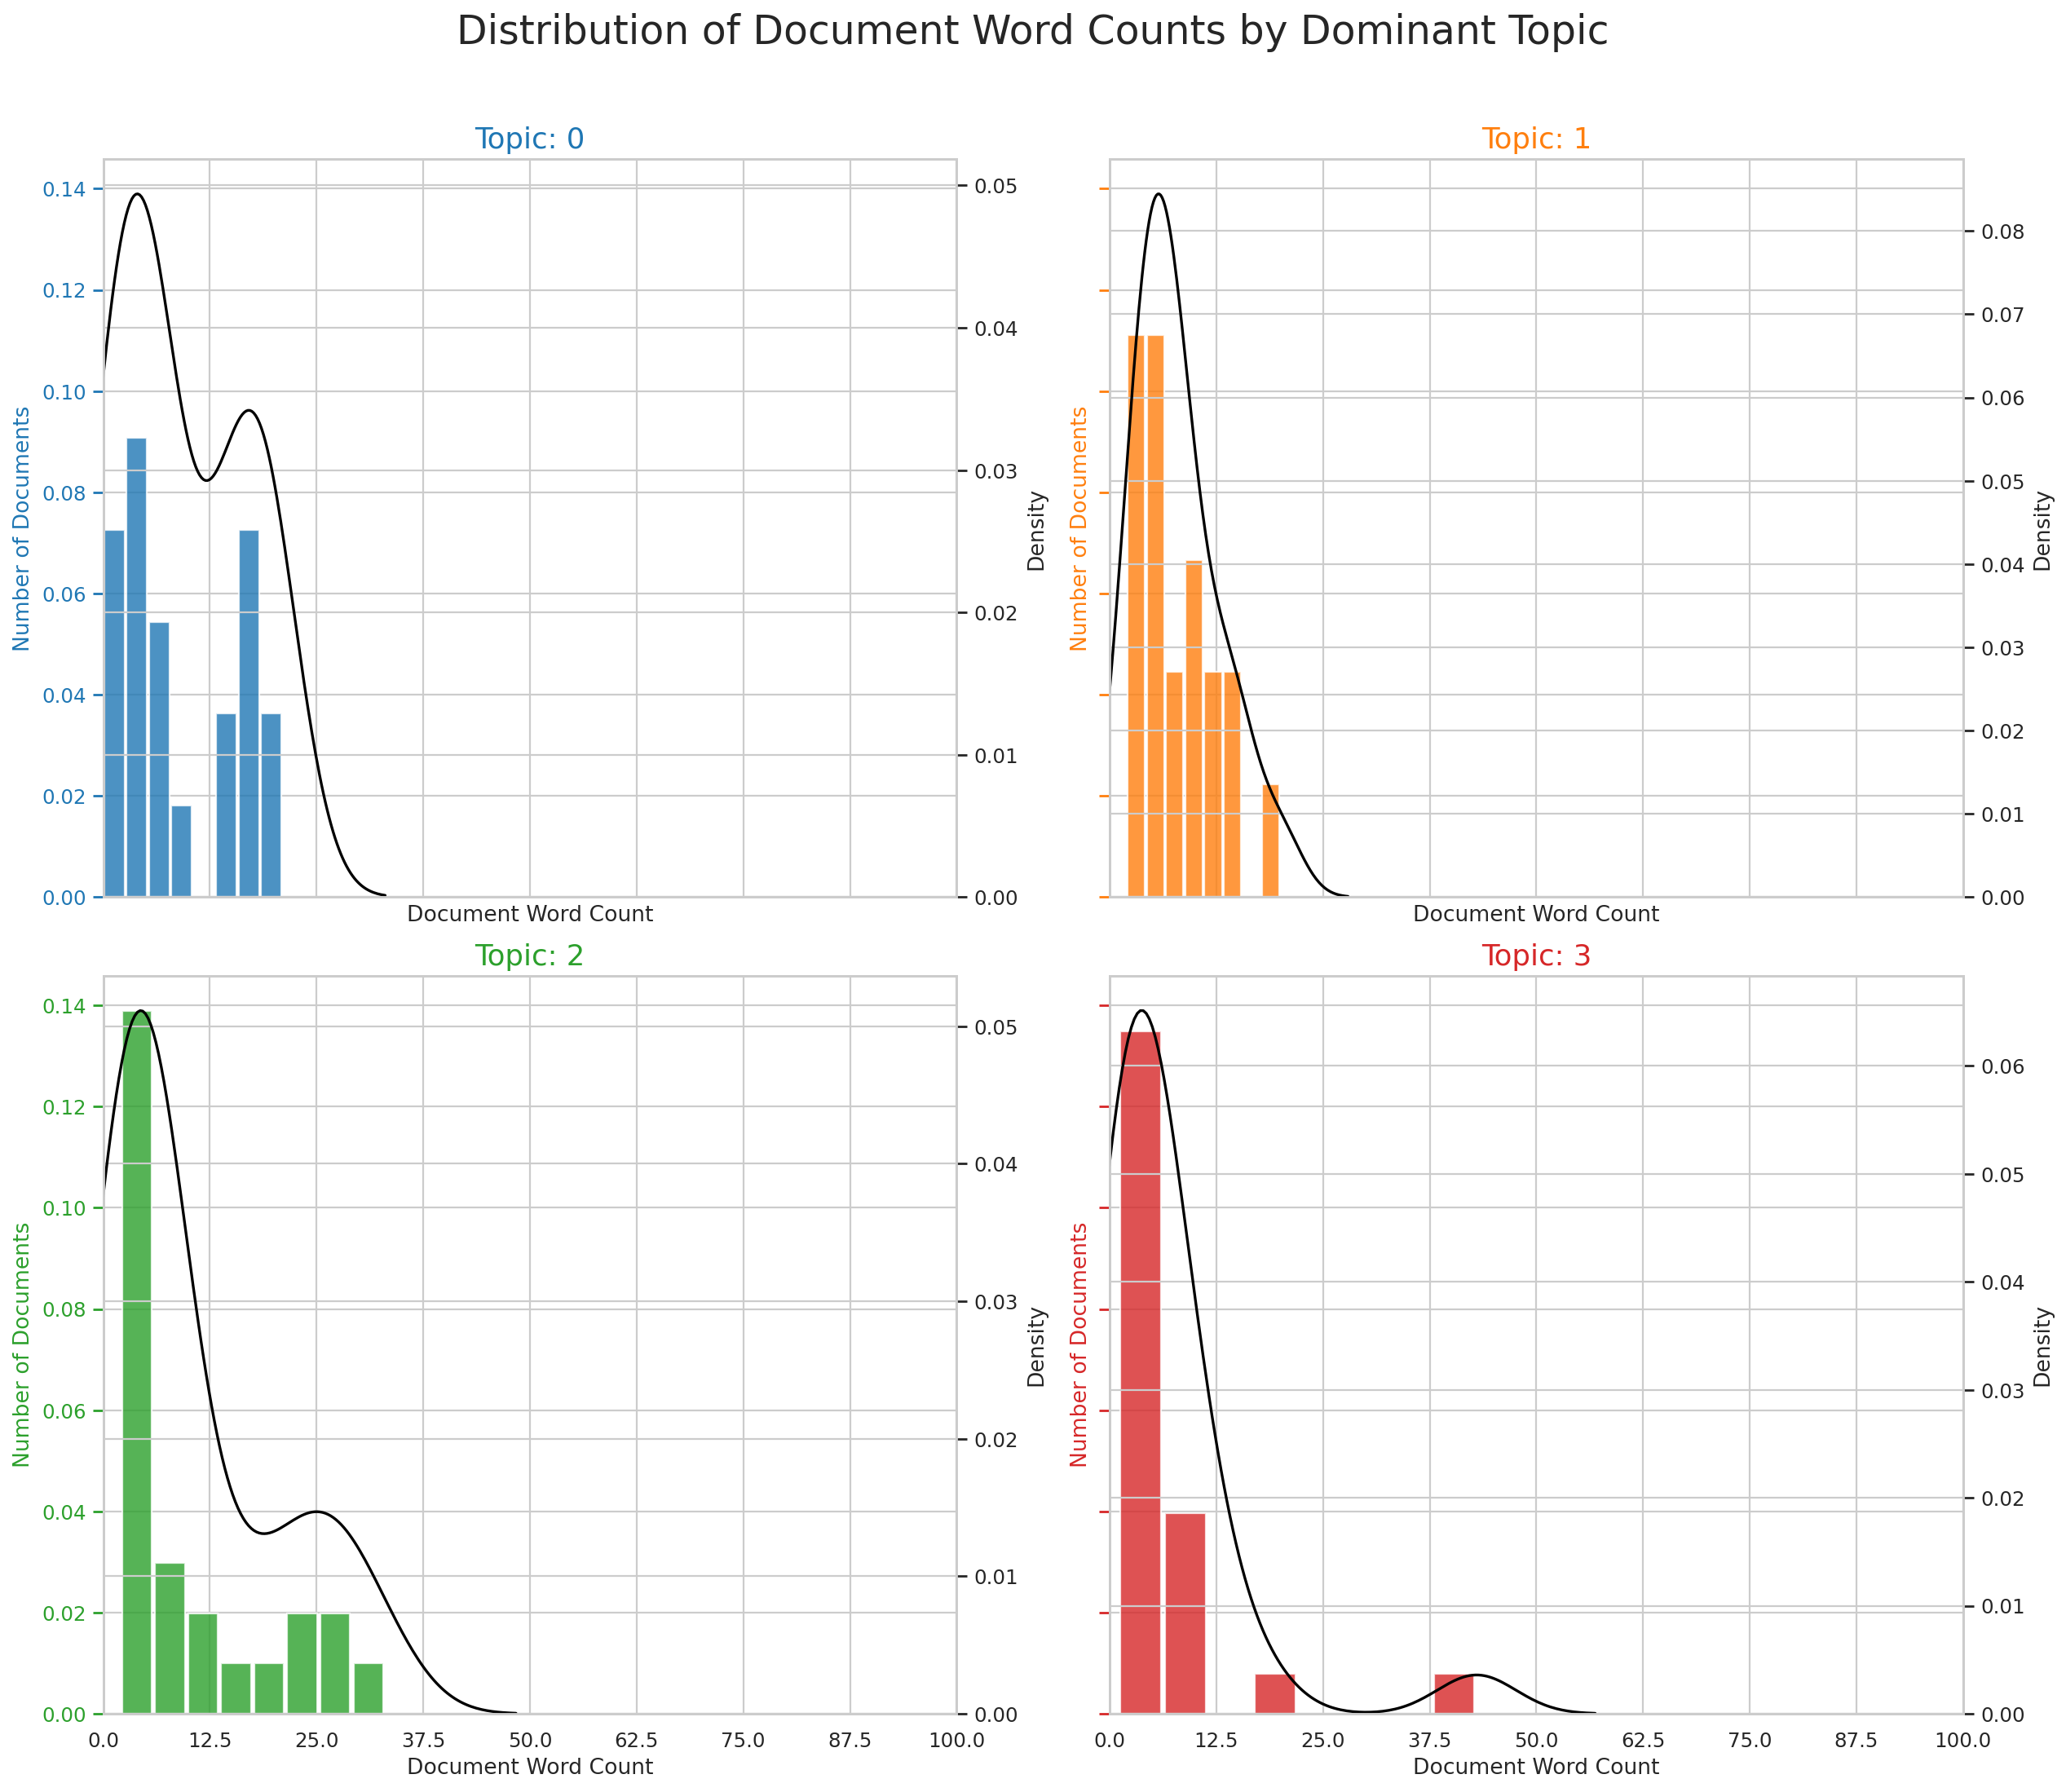

In [67]:
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14),dpi = 160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 8, color=cols[i], alpha=.8,rwidth=0.9, density=True, align='mid')
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 75), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()


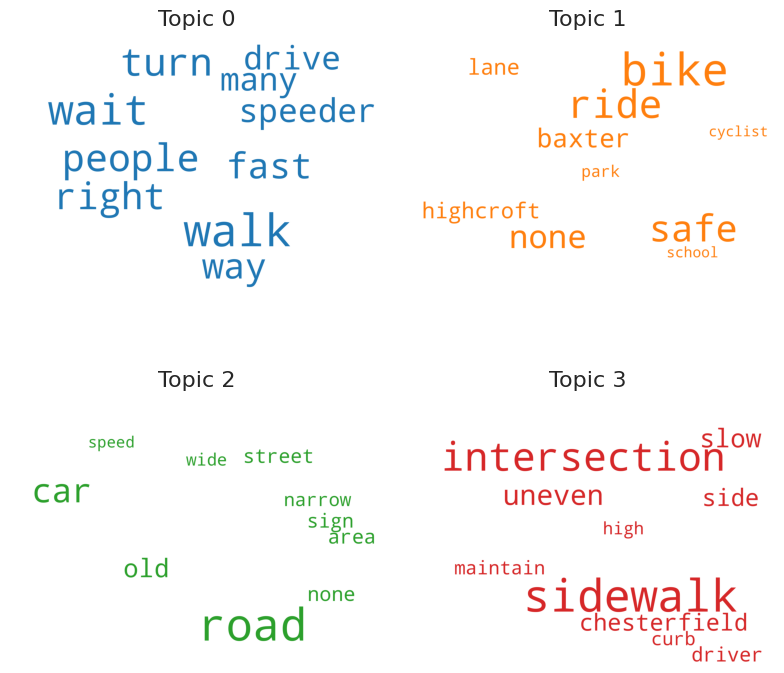

In [68]:
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

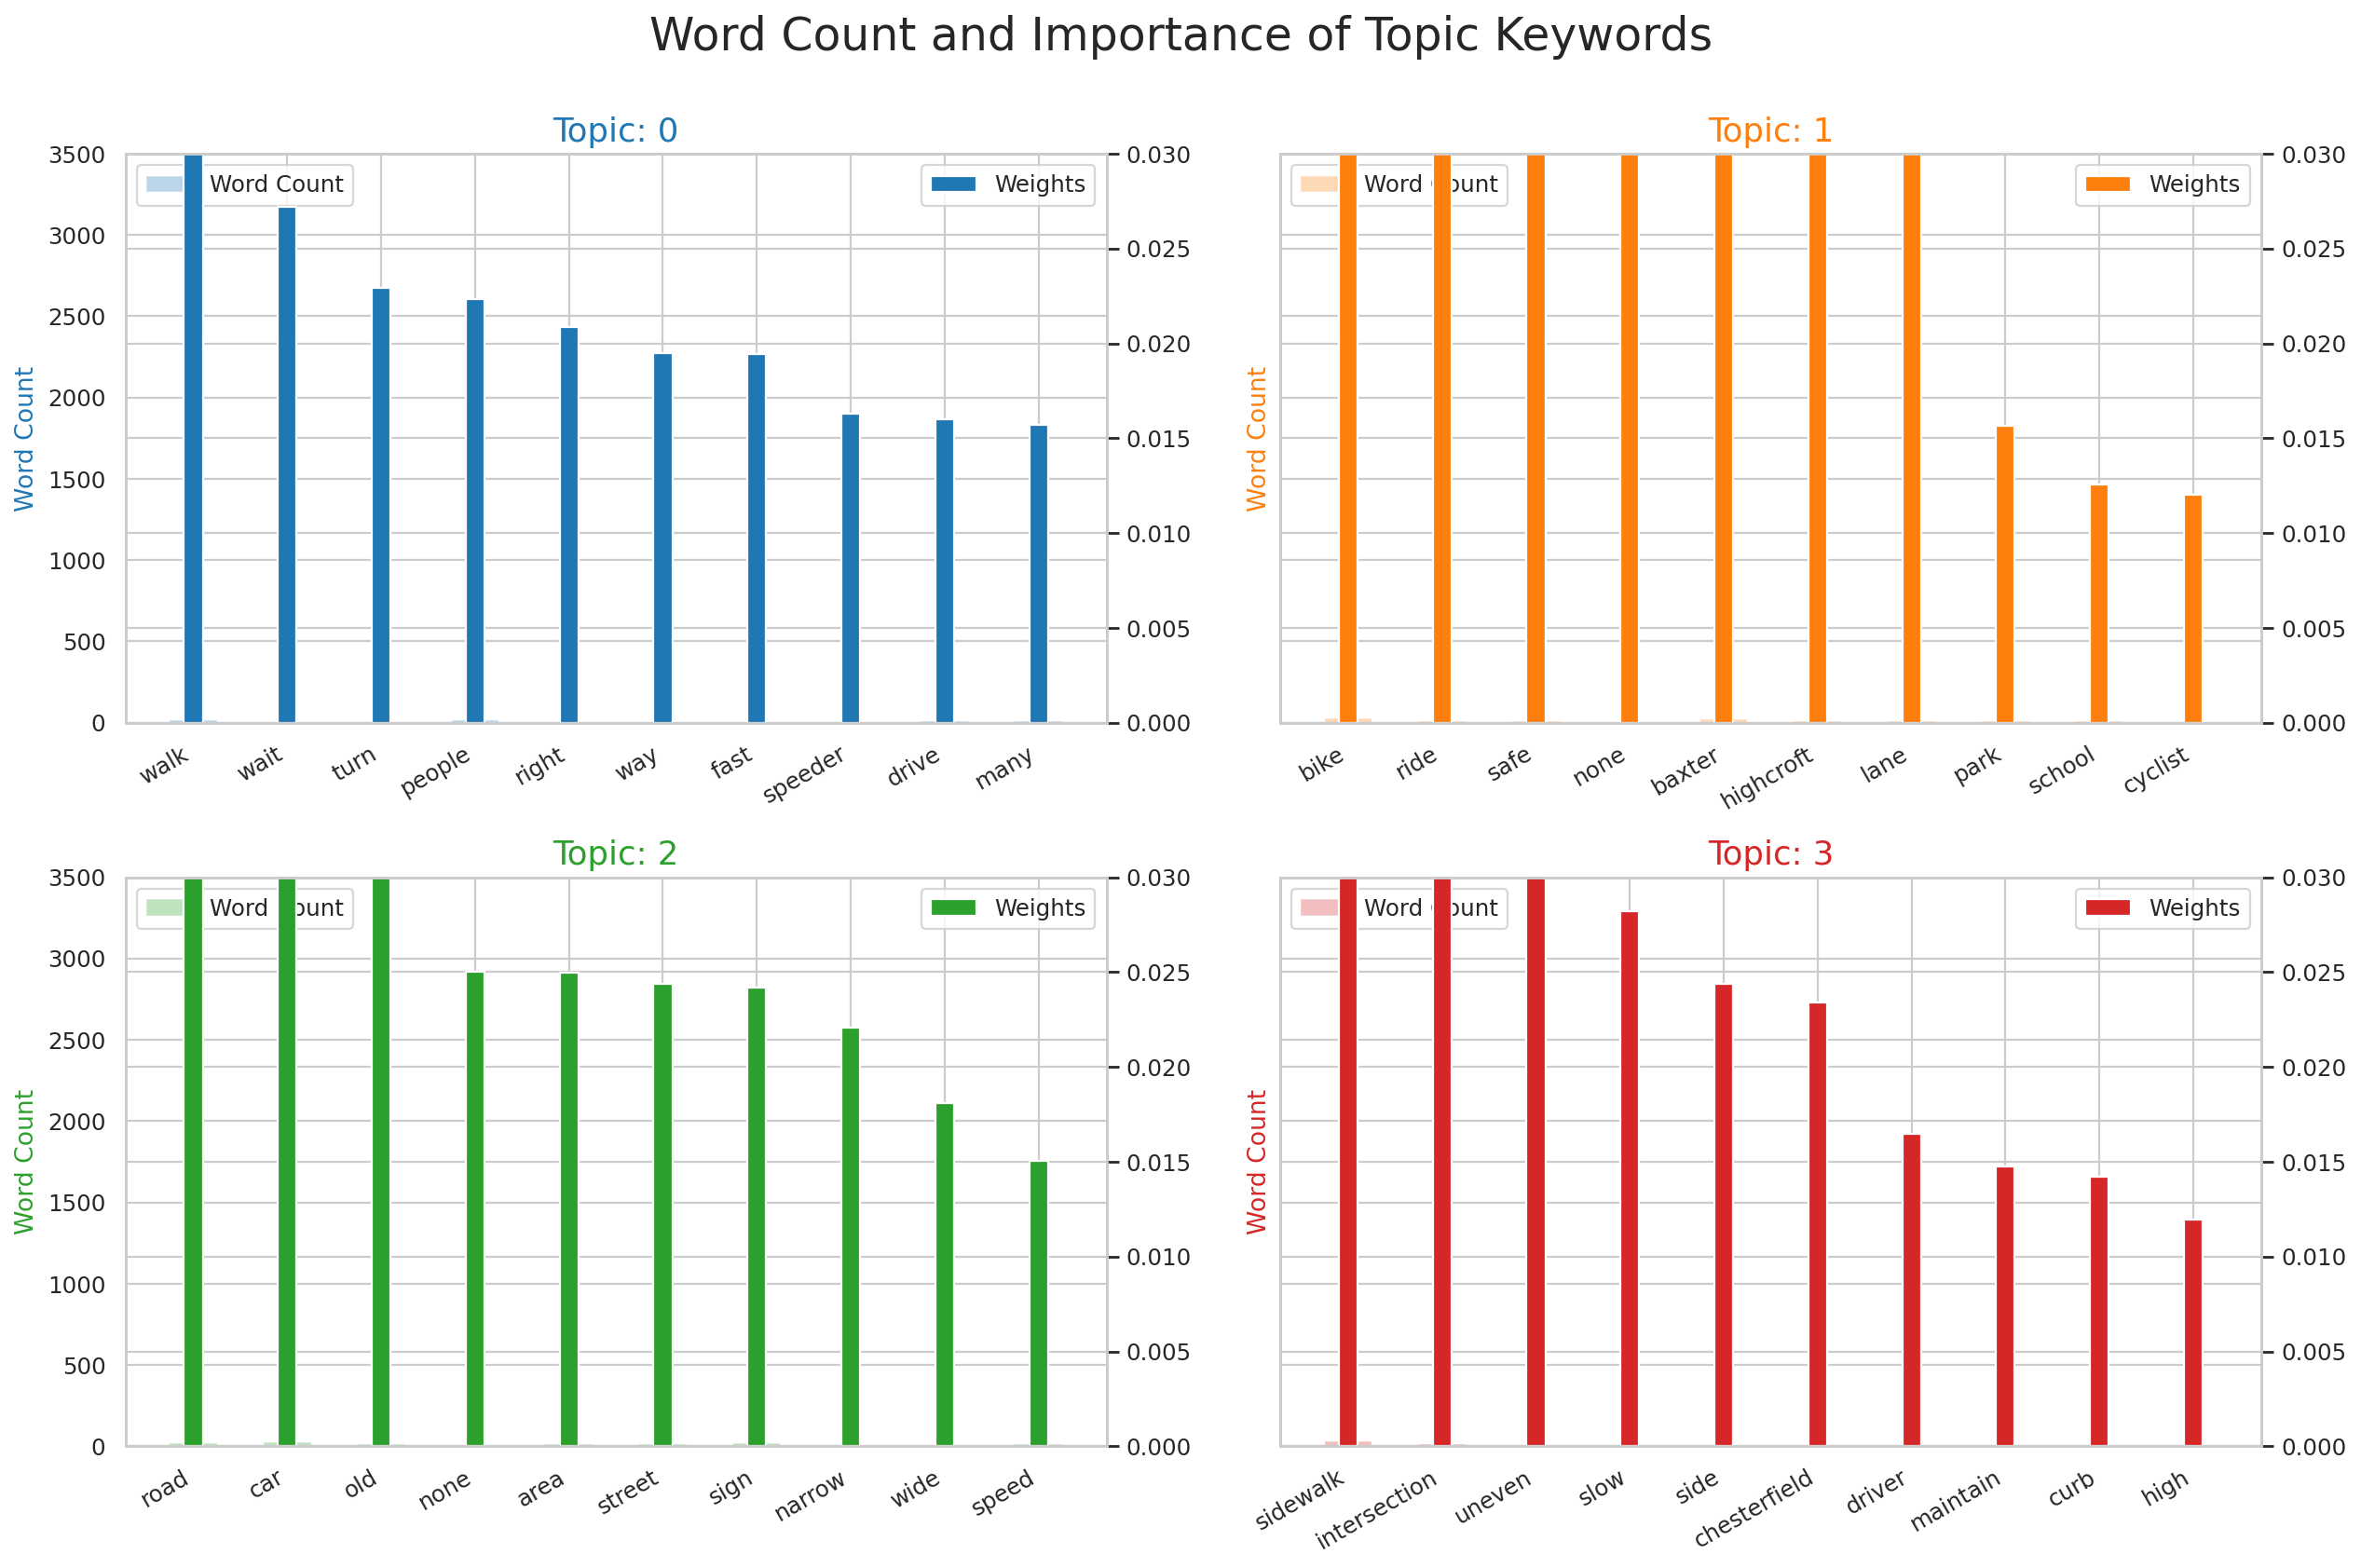

In [69]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()